In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import variation

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/JoyceSilveira/Aceleracao_Codenation/master/Dados/train.csv")
dataset.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [ ]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dataset_notas = dataset[colunas_de_notas].dropna()
dataset_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dataset_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
0,436.3,495.4,581.2,399.4,520.0
1,474.5,544.1,599.0,459.8,580.0
5,439.7,583.2,410.9,364.5,620.0
6,420.1,604.2,484.5,529.2,560.0
7,619.6,625.8,611.2,566.7,620.0


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(dataset_notas, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [ ]:
profile

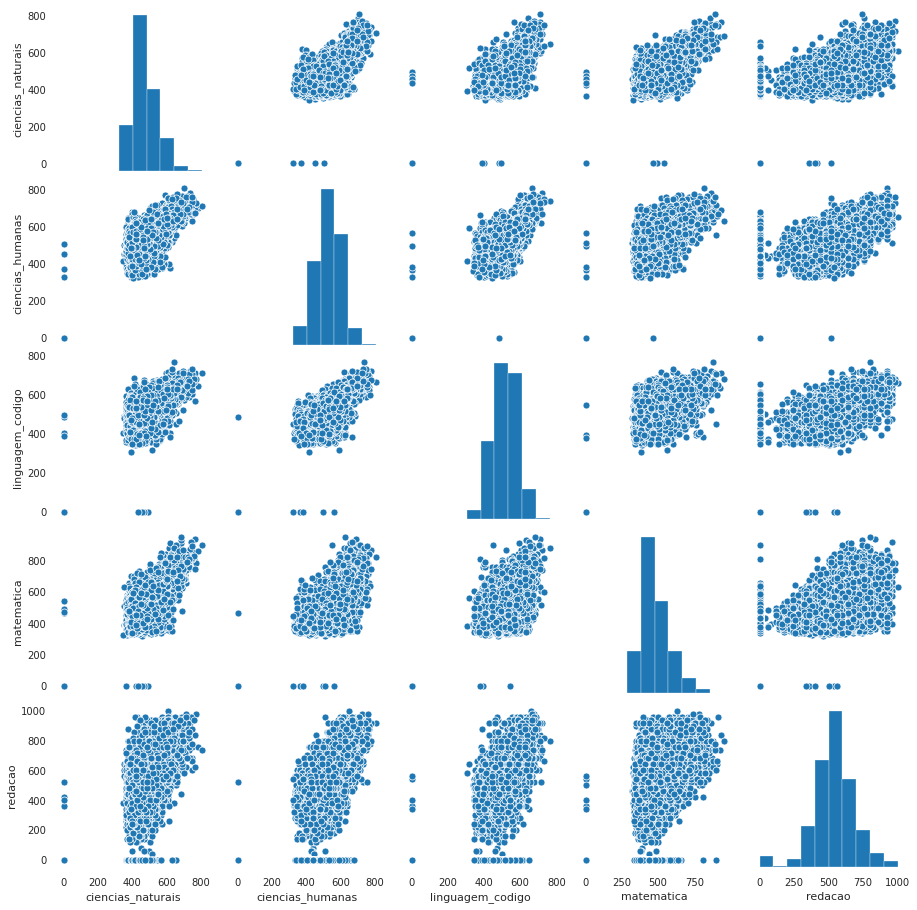

In [ ]:
sns.pairplot(dataset_notas)

In [ ]:
dataset_notas.shape

(10097, 5)

In [ ]:
dataset_notas_NZ = dataset_notas.replace(0, np.NaN).dropna(how='all').fillna(0)
dataset_notas_NZ.shape

(10096, 5)

In [ ]:
features = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'redacao']

dataset_notas_NZ['media']  = dataset_notas_NZ[features].apply(np.mean, axis=1)
dataset_notas_NZ['mediana'] = dataset_notas_NZ[features].apply(np.median, axis=1)
dataset_notas_NZ['desvioP'] = dataset_notas_NZ[features].apply(np.std, axis=1)
dataset_notas_NZ['coefVar'] = dataset_notas_NZ[features].apply(variation, axis=1)

In [ ]:
dataset_notas_NZ.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao,media,mediana,desvioP,coefVar
0,436.3,495.4,581.2,399.4,520.0,508.225,507.70,51.965584,0.102249
1,474.5,544.1,599.0,459.8,580.0,549.400,562.05,47.525309,0.086504
5,439.7,583.2,410.9,364.5,620.0,513.450,511.45,89.684907,0.174671
6,420.1,604.2,484.5,529.2,560.0,517.200,522.25,70.531092,0.136371
7,619.6,625.8,611.2,566.7,620.0,619.150,619.80,5.204565,0.008406


In [ ]:
coluna_label = 'matematica'
coluna_features = features + ['media', 'mediana', 'desvioP', 'coefVar']

x_treino = dataset_notas_NZ[coluna_features].to_numpy()
y_treino = dataset_notas_NZ[coluna_label].to_numpy()

In [ ]:
SEED = 0xCAFEF0DA